In [24]:
# Import dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list 
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

2924

In [6]:
# Import the requests library 
import requests

# Import the API key
from config import weather_api_key


In [7]:
# Starting URL for Weather Map API Call. 
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 75.97,
  'feels_like': 76.8,
  'temp_min': 70.72,
  'temp_max': 80.17,
  'pressure': 1011,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 5.99, 'deg': 231, 'gust': 8.99},
 'clouds': {'all': 90},
 'dt': 1622828816,
 'sys': {'type': 2,
  'id': 2009921,
  'country': 'US',
  'sunrise': 1622797730,
  'sunset': 1622852203},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [9]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data['sys']['country']

'US'

In [10]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 80.17 75 90 5.99


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | nantucket
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | nome
Processing Record 5 of Set 1 | mergui
City not found. Skipping...
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | guerrero negro
Processing Record 11 of Set 1 | pueblo nuevo
Processing Record 12 of Set 1 | cayenne
Processing Record 13 of Set 1 | kahului
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | moba
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | mujiayingzi
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | saint-joseph
Processing Record 23 of Set 1 | morehead
Proces

Processing Record 38 of Set 4 | roebourne
Processing Record 39 of Set 4 | ketchikan
Processing Record 40 of Set 4 | narsaq
Processing Record 41 of Set 4 | zhezkazgan
Processing Record 42 of Set 4 | inuvik
Processing Record 43 of Set 4 | rocha
Processing Record 44 of Set 4 | sangar
Processing Record 45 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 4 | sosnovo-ozerskoye
Processing Record 47 of Set 4 | yar-sale
Processing Record 48 of Set 4 | dolbeau
City not found. Skipping...
Processing Record 49 of Set 4 | wau
Processing Record 50 of Set 4 | caravelas
Processing Record 1 of Set 5 | katherine
Processing Record 2 of Set 5 | la huacana
Processing Record 3 of Set 5 | valparaiso
Processing Record 4 of Set 5 | umm lajj
Processing Record 5 of Set 5 | villa bruzual
Processing Record 6 of Set 5 | harare
Processing Record 7 of Set 5 | clyde river
Processing Record 8 of Set 5 | mana
Processing Record 9 of Set 5 | butaritari
Processing Record 10 of Set 5 | pochink

Processing Record 26 of Set 8 | la sarre
Processing Record 27 of Set 8 | kopavogur
Processing Record 28 of Set 8 | antofagasta
Processing Record 29 of Set 8 | brookhaven
Processing Record 30 of Set 8 | isla vista
Processing Record 31 of Set 8 | bonavista
Processing Record 32 of Set 8 | faya
Processing Record 33 of Set 8 | ancud
Processing Record 34 of Set 8 | monrovia
Processing Record 35 of Set 8 | kaifeng
Processing Record 36 of Set 8 | nador
Processing Record 37 of Set 8 | birjand
Processing Record 38 of Set 8 | mazulskiy
City not found. Skipping...
Processing Record 39 of Set 8 | petatlan
Processing Record 40 of Set 8 | celestun
Processing Record 41 of Set 8 | sobradinho
Processing Record 42 of Set 8 | ituni
City not found. Skipping...
Processing Record 43 of Set 8 | niamey
Processing Record 44 of Set 8 | whitehorse
Processing Record 45 of Set 8 | zharkent
Processing Record 46 of Set 8 | loni
Processing Record 47 of Set 8 | karaul
City not found. Skipping...
Processing Record 48 of

Processing Record 12 of Set 12 | maridi
Processing Record 13 of Set 12 | makkaveyevo
Processing Record 14 of Set 12 | camacha
Processing Record 15 of Set 12 | leningradskiy
Processing Record 16 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 17 of Set 12 | cleethorpes
Processing Record 18 of Set 12 | asyut
Processing Record 19 of Set 12 | diveyevo
Processing Record 20 of Set 12 | jiuquan
Processing Record 21 of Set 12 | cordoba
Processing Record 22 of Set 12 | henderson
Processing Record 23 of Set 12 | touros
Processing Record 24 of Set 12 | port-gentil
Processing Record 25 of Set 12 | la ronge
Processing Record 26 of Set 12 | tafo
Processing Record 27 of Set 12 | komsomolskiy
Processing Record 28 of Set 12 | porbandar
Processing Record 29 of Set 12 | cosala
Processing Record 30 of Set 12 | ewa beach
Processing Record 31 of Set 12 | buraydah
Processing Record 32 of Set 12 | mocuba
Processing Record 33 of Set 12 | quesnel
Processing Record 34 of Set 12 | ilebo
Processing Record 

Processing Record 1 of Set 16 | urusha
Processing Record 2 of Set 16 | morant bay
Processing Record 3 of Set 16 | mendeleyevo
Processing Record 4 of Set 16 | artyk
City not found. Skipping...
Processing Record 5 of Set 16 | pokhara
Processing Record 6 of Set 16 | bolungarvik
City not found. Skipping...
Processing Record 7 of Set 16 | borogontsy
Processing Record 8 of Set 16 | soligalich
Processing Record 9 of Set 16 | cervo
Processing Record 10 of Set 16 | alofi
Processing Record 11 of Set 16 | skjervoy
Processing Record 12 of Set 16 | ubatuba
Processing Record 13 of Set 16 | ust-ilimsk
Processing Record 14 of Set 16 | san lazaro
Processing Record 15 of Set 16 | ivankiv
Processing Record 16 of Set 16 | thaton
Processing Record 17 of Set 16 | manggar
Processing Record 18 of Set 16 | morrope
Processing Record 19 of Set 16 | simbahan
Processing Record 20 of Set 16 | toora-khem
Processing Record 21 of Set 16 | melbourne
Processing Record 22 of Set 16 | kenai
Processing Record 23 of Set 16 

Processing Record 34 of Set 19 | coelho neto
Processing Record 35 of Set 19 | washougal
Processing Record 36 of Set 19 | kyabram
Processing Record 37 of Set 19 | pamplona
Processing Record 38 of Set 19 | issia
Processing Record 39 of Set 19 | kjollefjord
Processing Record 40 of Set 19 | saint-augustin
Processing Record 41 of Set 19 | samalaeulu
City not found. Skipping...
Processing Record 42 of Set 19 | dona ines
Processing Record 43 of Set 19 | aloleng
Processing Record 44 of Set 19 | terrace
Processing Record 45 of Set 19 | casa nova
Processing Record 46 of Set 19 | igbon
Processing Record 47 of Set 19 | voyvozh
Processing Record 48 of Set 19 | iskateley
Processing Record 49 of Set 19 | sinnamary
Processing Record 50 of Set 19 | ko samui
Processing Record 1 of Set 20 | tubuala
Processing Record 2 of Set 20 | kaspiysk
Processing Record 3 of Set 20 | sidney
Processing Record 4 of Set 20 | atyrau
Processing Record 5 of Set 20 | banda aceh
Processing Record 6 of Set 20 | hambantota
Proc

Processing Record 21 of Set 23 | malkangiri
Processing Record 22 of Set 23 | ginir
Processing Record 23 of Set 23 | rosedale
Processing Record 24 of Set 23 | canton
Processing Record 25 of Set 23 | awbari
Processing Record 26 of Set 23 | ayan
Processing Record 27 of Set 23 | batticaloa
Processing Record 28 of Set 23 | lake havasu city
Processing Record 29 of Set 23 | jandaia do sul
Processing Record 30 of Set 23 | morondava
Processing Record 31 of Set 23 | ust-kamchatsk
City not found. Skipping...
Processing Record 32 of Set 23 | bitung
Processing Record 33 of Set 23 | cocoa beach
Processing Record 34 of Set 23 | chimbote
Processing Record 35 of Set 23 | parthenay
Processing Record 36 of Set 23 | camopi
Processing Record 37 of Set 23 | battle creek
Processing Record 38 of Set 23 | arrifes
Processing Record 39 of Set 23 | northam
Processing Record 40 of Set 23 | kutoarjo
Processing Record 41 of Set 23 | kuminskiy
Processing Record 42 of Set 23 | slonim
Processing Record 43 of Set 23 | c

Processing Record 5 of Set 27 | ahuimanu
Processing Record 6 of Set 27 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 7 of Set 27 | pucallpa
Processing Record 8 of Set 27 | veseloyarsk
Processing Record 9 of Set 27 | utiroa
City not found. Skipping...
Processing Record 10 of Set 27 | kedrovyy
Processing Record 11 of Set 27 | alappuzha
Processing Record 12 of Set 27 | kenora
Processing Record 13 of Set 27 | kichera
Processing Record 14 of Set 27 | marsaxlokk
Processing Record 15 of Set 27 | mandiana
Processing Record 16 of Set 27 | goderich
Processing Record 17 of Set 27 | chavakkad
Processing Record 18 of Set 27 | umm kaddadah
Processing Record 19 of Set 27 | kharp
Processing Record 20 of Set 27 | fengzhen
Processing Record 21 of Set 27 | moindou
Processing Record 22 of Set 27 | sestri levante
Processing Record 23 of Set 27 | yamada
Processing Record 24 of Set 27 | xining
Processing Record 25 of Set 27 | tomari
Processing Record 26 of Set 27 | puerto madryn
Proces

Processing Record 41 of Set 30 | goure
Processing Record 42 of Set 30 | bisho
Processing Record 43 of Set 30 | rimini
Processing Record 44 of Set 30 | farmington
Processing Record 45 of Set 30 | turkan
Processing Record 46 of Set 30 | ongandjera
Processing Record 47 of Set 30 | mercedes
Processing Record 48 of Set 30 | nelson bay
Processing Record 49 of Set 30 | banjarmasin
Processing Record 50 of Set 30 | encheng
Processing Record 1 of Set 31 | cockburn harbour
City not found. Skipping...
Processing Record 2 of Set 31 | pervomayskoye
Processing Record 3 of Set 31 | malwan
City not found. Skipping...
Processing Record 4 of Set 31 | pyapon
Processing Record 5 of Set 31 | rawannawi
City not found. Skipping...
Processing Record 6 of Set 31 | pyaozerskiy
Processing Record 7 of Set 31 | gorno-altaysk
Processing Record 8 of Set 31 | barbar
City not found. Skipping...
Processing Record 9 of Set 31 | dien bien
City not found. Skipping...
Processing Record 10 of Set 31 | newport
Processing Reco

Processing Record 27 of Set 34 | businga
Processing Record 28 of Set 34 | matameye
City not found. Skipping...
Processing Record 29 of Set 34 | khasan
Processing Record 30 of Set 34 | joinville
Processing Record 31 of Set 34 | sale
Processing Record 32 of Set 34 | najran
Processing Record 33 of Set 34 | juifang
City not found. Skipping...
Processing Record 34 of Set 34 | el faiyum
City not found. Skipping...
Processing Record 35 of Set 34 | nanchang
Processing Record 36 of Set 34 | naron
Processing Record 37 of Set 34 | male
Processing Record 38 of Set 34 | auala
City not found. Skipping...
Processing Record 39 of Set 34 | muriti
Processing Record 40 of Set 34 | angoche
Processing Record 41 of Set 34 | ocean city
Processing Record 42 of Set 34 | garmsar
Processing Record 43 of Set 34 | bogorodskoye
Processing Record 44 of Set 34 | santa vitoria do palmar
Processing Record 45 of Set 34 | wufeng
Processing Record 46 of Set 34 | tacuarembo
Processing Record 47 of Set 34 | jalingo
Processi

Processing Record 13 of Set 38 | buckeye
Processing Record 14 of Set 38 | sukhobuzimskoye
Processing Record 15 of Set 38 | tianpeng
Processing Record 16 of Set 38 | san pedro
Processing Record 17 of Set 38 | lolua
City not found. Skipping...
Processing Record 18 of Set 38 | dharchula
Processing Record 19 of Set 38 | parnarama
Processing Record 20 of Set 38 | balkhash
Processing Record 21 of Set 38 | sinnar
Processing Record 22 of Set 38 | belleville
Processing Record 23 of Set 38 | tommot
Processing Record 24 of Set 38 | cockburn town
Processing Record 25 of Set 38 | kondagaon
Processing Record 26 of Set 38 | jinchang
Processing Record 27 of Set 38 | bindura
Processing Record 28 of Set 38 | nanchong
Processing Record 29 of Set 38 | la rioja
Processing Record 30 of Set 38 | suileng
Processing Record 31 of Set 38 | dukat
Processing Record 32 of Set 38 | paramonga
Processing Record 33 of Set 38 | alberton
Processing Record 34 of Set 38 | chumikan
Processing Record 35 of Set 38 | bang saph

Processing Record 50 of Set 41 | vorontsovka
Processing Record 1 of Set 42 | saint-cesaire
Processing Record 2 of Set 42 | nam tha
City not found. Skipping...
Processing Record 3 of Set 42 | tahe
Processing Record 4 of Set 42 | vernon
Processing Record 5 of Set 42 | soverato
Processing Record 6 of Set 42 | tabuk
Processing Record 7 of Set 42 | jining
Processing Record 8 of Set 42 | ljubinje
Processing Record 9 of Set 42 | buinsk
Processing Record 10 of Set 42 | mathathane
Processing Record 11 of Set 42 | tawkar
City not found. Skipping...
Processing Record 12 of Set 42 | west odessa
Processing Record 13 of Set 42 | north platte
Processing Record 14 of Set 42 | fort saint john
City not found. Skipping...
Processing Record 15 of Set 42 | san ignacio
Processing Record 16 of Set 42 | sindand
City not found. Skipping...
Processing Record 17 of Set 42 | lyuban
Processing Record 18 of Set 42 | leiyang
Processing Record 19 of Set 42 | floriano
Processing Record 20 of Set 42 | ratnagiri
Process

Processing Record 35 of Set 45 | arcata
Processing Record 36 of Set 45 | volga
Processing Record 37 of Set 45 | laktasi
Processing Record 38 of Set 45 | rambha
Processing Record 39 of Set 45 | thai binh
Processing Record 40 of Set 45 | bushehr
Processing Record 41 of Set 45 | nerchinskiy zavod
Processing Record 42 of Set 45 | klyuchi
Processing Record 43 of Set 45 | ingham
Processing Record 44 of Set 45 | waikuku
Processing Record 45 of Set 45 | nuneaton
Processing Record 46 of Set 45 | neftegorsk
Processing Record 47 of Set 45 | moberly
Processing Record 48 of Set 45 | finschhafen
Processing Record 49 of Set 45 | hulan ergi
Processing Record 50 of Set 45 | trairi
Processing Record 1 of Set 46 | sambava
Processing Record 2 of Set 46 | umtata
Processing Record 3 of Set 46 | rauma
Processing Record 4 of Set 46 | wahran
City not found. Skipping...
Processing Record 5 of Set 46 | galiwinku
City not found. Skipping...
Processing Record 6 of Set 46 | correntina
Processing Record 7 of Set 46 

Processing Record 20 of Set 49 | katiola
Processing Record 21 of Set 49 | huilong
Processing Record 22 of Set 49 | nagorsk
Processing Record 23 of Set 49 | bozeman
Processing Record 24 of Set 49 | glushkovo
Processing Record 25 of Set 49 | yudong
Processing Record 26 of Set 49 | salym
Processing Record 27 of Set 49 | sijunjung
Processing Record 28 of Set 49 | zamora
Processing Record 29 of Set 49 | goiatuba
Processing Record 30 of Set 49 | katete
Processing Record 31 of Set 49 | sexsmith
Processing Record 32 of Set 49 | ola
Processing Record 33 of Set 49 | son la
Processing Record 34 of Set 49 | santa rosalia
Processing Record 35 of Set 49 | hof
Processing Record 36 of Set 49 | ust-tsilma
Processing Record 37 of Set 49 | shimabara
Processing Record 38 of Set 49 | bungu
Processing Record 39 of Set 49 | moree
Processing Record 40 of Set 49 | sarakhs
Processing Record 41 of Set 49 | krasnyy kut
Processing Record 42 of Set 49 | tevaitoa
Processing Record 43 of Set 49 | chore
City not found

Processing Record 8 of Set 53 | khandagayty
Processing Record 9 of Set 53 | pyay
Processing Record 10 of Set 53 | palmdale
Processing Record 11 of Set 53 | amethi
Processing Record 12 of Set 53 | vangaindrano
Processing Record 13 of Set 53 | camacupa
Processing Record 14 of Set 53 | tuni
Processing Record 15 of Set 53 | bosaso
Processing Record 16 of Set 53 | canto do buriti
Processing Record 17 of Set 53 | usolye
Processing Record 18 of Set 53 | san angelo
Processing Record 19 of Set 53 | uruzgan
Processing Record 20 of Set 53 | vero beach
Processing Record 21 of Set 53 | montepuez
Processing Record 22 of Set 53 | lins
Processing Record 23 of Set 53 | le port
Processing Record 24 of Set 53 | thohoyandou
Processing Record 25 of Set 53 | romitan
Processing Record 26 of Set 53 | parang
Processing Record 27 of Set 53 | vrhnika
Processing Record 28 of Set 53 | iskenderun
Processing Record 29 of Set 53 | eydhafushi
Processing Record 30 of Set 53 | amahai
Processing Record 31 of Set 53 | for

Processing Record 48 of Set 56 | nizhniy bestyakh
Processing Record 49 of Set 56 | mugur-aksy
Processing Record 50 of Set 56 | lhokseumawe
Processing Record 1 of Set 57 | inverell
Processing Record 2 of Set 57 | lucelia
Processing Record 3 of Set 57 | kawambwa
Processing Record 4 of Set 57 | ullapool
Processing Record 5 of Set 57 | great falls
Processing Record 6 of Set 57 | orlik
Processing Record 7 of Set 57 | xingcheng
Processing Record 8 of Set 57 | haapu
City not found. Skipping...
Processing Record 9 of Set 57 | andra
Processing Record 10 of Set 57 | kiama
Processing Record 11 of Set 57 | payo
Processing Record 12 of Set 57 | okulovka
Processing Record 13 of Set 57 | frederico westphalen
Processing Record 14 of Set 57 | sesvete
Processing Record 15 of Set 57 | magalia
Processing Record 16 of Set 57 | tadine
Processing Record 17 of Set 57 | oyon
Processing Record 18 of Set 57 | shirgaon
Processing Record 19 of Set 57 | henzada
City not found. Skipping...
Processing Record 20 of Se

In [14]:
# Convert the array of dictionaries to Pandas DataFrame
city_data_df= pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,78.53,69,100,3.18,US,2021-06-04 17:49:45
1,Nantucket,41.2835,-70.0995,66.96,99,90,11.50,US,2021-06-04 17:49:45
2,Mataura,-46.1927,168.8643,49.48,93,95,4.18,NZ,2021-06-04 17:49:45
3,Nome,64.5011,-165.4064,33.87,75,90,12.66,US,2021-06-04 17:49:46
4,Bluff,-46.6000,168.3333,49.80,82,99,13.56,NZ,2021-06-04 17:49:46
5,Cape Town,-33.9258,18.4232,59.11,81,0,5.01,ZA,2021-06-04 17:48:42
6,Tuktoyaktuk,69.4541,-133.0374,35.60,100,90,8.05,CA,2021-06-04 17:49:46
7,Puerto Ayora,-0.7393,-90.3518,82.36,78,65,5.99,EC,2021-06-04 17:49:47
8,Guerrero Negro,27.9769,-114.0611,76.86,41,0,9.42,MX,2021-06-04 17:49:47
9,Pueblo Nuevo,23.3833,-105.3833,74.25,35,1,7.58,MX,2021-06-04 17:49:47


In [15]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-06-04 17:49:45,42.6001,-73.9662,78.53,69,100,3.18
1,Nantucket,US,2021-06-04 17:49:45,41.2835,-70.0995,66.96,99,90,11.50
2,Mataura,NZ,2021-06-04 17:49:45,-46.1927,168.8643,49.48,93,95,4.18
3,Nome,US,2021-06-04 17:49:46,64.5011,-165.4064,33.87,75,90,12.66
4,Bluff,NZ,2021-06-04 17:49:46,-46.6000,168.3333,49.80,82,99,13.56
5,Cape Town,ZA,2021-06-04 17:48:42,-33.9258,18.4232,59.11,81,0,5.01
6,Tuktoyaktuk,CA,2021-06-04 17:49:46,69.4541,-133.0374,35.60,100,90,8.05
7,Puerto Ayora,EC,2021-06-04 17:49:47,-0.7393,-90.3518,82.36,78,65,5.99
8,Guerrero Negro,MX,2021-06-04 17:49:47,27.9769,-114.0611,76.86,41,0,9.42
9,Pueblo Nuevo,MX,2021-06-04 17:49:47,23.3833,-105.3833,74.25,35,1,7.58


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

ValueError: x and y must be the same size

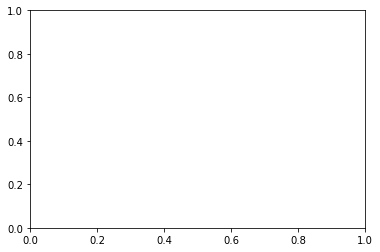

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

NameError: name 'cloudiness' is not defined

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

NameError: name 'wind_speed' is not defined

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-06-04 17:49:45,42.6001,-73.9662,78.53,69,100,3.18
1,Nantucket,US,2021-06-04 17:49:45,41.2835,-70.0995,66.96,99,90,11.50
3,Nome,US,2021-06-04 17:49:46,64.5011,-165.4064,33.87,75,90,12.66
6,Tuktoyaktuk,CA,2021-06-04 17:49:46,69.4541,-133.0374,35.60,100,90,8.05
8,Guerrero Negro,MX,2021-06-04 17:49:47,27.9769,-114.0611,76.86,41,0,9.42


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

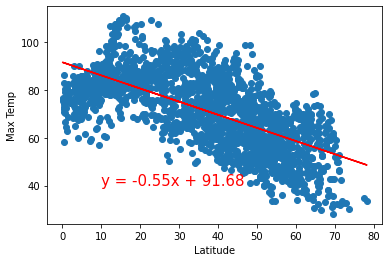

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

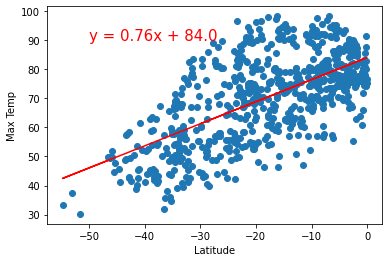

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

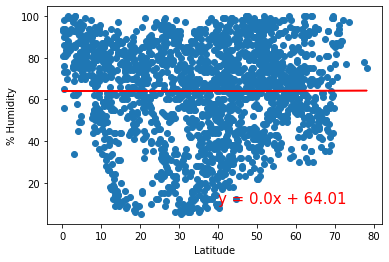

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


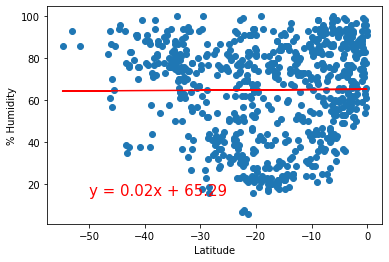

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

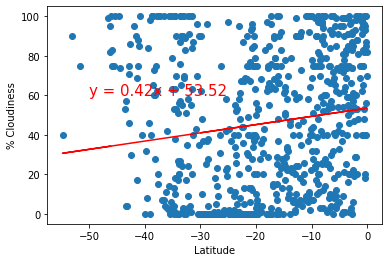

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

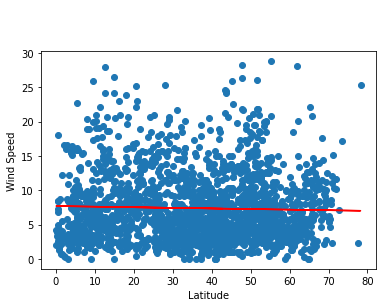

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

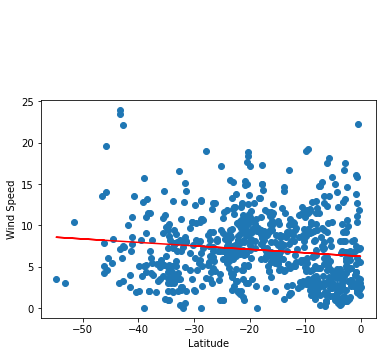

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))